# 04다중클래스분류_callback사용해_과적합_막고_최고성능모델_저장하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [4]:
data = pd.read_csv("./data/winequality-white.csv", sep=";")

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

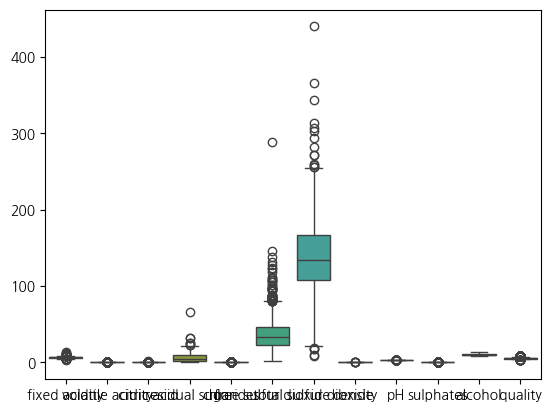

In [7]:
sns.boxplot(data)

In [8]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler



In [11]:
X = data.drop('quality', axis=1)
y = data['quality']

In [12]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [15]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [16]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [19]:
# 홀드아웃 진행
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)

In [21]:
# 스케일링
rs = RobustScaler()
train_temp = rs.fit_transform(X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)

rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index=X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)

rs_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3940,0.090909,1.272727,0.416667,0.451220,0.714286,0.090909,0.216667,0.507205,-0.05,0.142857,-0.578947
3905,-0.272727,0.636364,-0.166667,-0.170732,-0.500000,0.000000,-0.783333,-0.811527,0.40,1.071429,1.105263
53,-0.363636,-0.727273,0.250000,-0.512195,0.142857,0.227273,-0.450000,-0.622478,0.70,-0.928571,0.263158
2576,-0.272727,0.090909,0.666667,0.585366,-0.285714,1.818182,1.533333,0.465706,0.05,0.142857,-0.526316
1970,1.363636,2.090909,0.916667,-0.329268,-0.500000,-0.090909,-0.316667,0.138329,0.30,-0.071429,0.157895
...,...,...,...,...,...,...,...,...,...,...,...
2609,0.272727,-0.545455,-0.166667,-0.524390,-1.714286,-1.363636,-1.783333,-1.035159,0.15,-0.857143,0.842105
2530,-0.909091,0.363636,-1.666667,-0.439024,-0.500000,1.045455,0.466667,-0.325072,1.05,0.785714,0.052632
1231,1.000000,1.363636,0.416667,-0.085366,-0.928571,0.272727,-0.350000,-0.414986,0.00,0.428571,1.052632
3948,-1.000000,-1.090909,-0.166667,0.024390,0.142857,-0.363636,-0.500000,0.205187,0.75,-0.214286,-0.578947


In [25]:
y_train

,3,4,5,6,7,8,9
3940,False,False,True,False,False,False,False
3905,False,False,False,False,True,False,False
53,False,False,False,True,False,False,False
2576,False,False,True,False,False,False,False
1970,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
2609,False,False,False,True,False,False,False
2530,False,False,False,True,False,False,False
1231,False,False,False,False,True,False,False
3948,False,False,True,False,False,False,False


# 모델을 최고 성능에서 저장하고 중지하기

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [46]:
model = Sequential()
model.add(Input(shape=(rs_X_train.shape[1],)))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
import os

In [48]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=1000)
os.makedirs("./model", exist_ok=True) #디렉토리 자동 생성
filepath = "./model/whitewine_loss_{val_loss:.4f}_epoch_{epoch:04d}__.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(rs_X_train, y_train,
                   epochs=1000, 
                   batch_size=32,
                   validation_data=(rs_X_valid, y_valid),
                   callbacks=[early_stop, model_save])

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

Epoch 1/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3903 - loss: 1.6919 - val_accuracy: 0.5327 - val_loss: 1.2358
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5247 - loss: 1.1966 - val_accuracy: 0.5500 - val_loss: 1.1700
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5367 - loss: 1.1472 - val_accuracy: 0.5561 - val_loss: 1.1419
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 1.0831 - val_accuracy: 0.5633 - val_loss: 1.1241
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5636 - loss: 1.0541 - val_accuracy: 0.5602 - val_loss: 1.1112
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5667 - loss: 1.0493 - val_accuracy: 0.5643 - val_loss: 1.0976
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5567 - loss: 1.0426 - val_accuracy: 0.5714 - val_loss: 1.0867
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5573 - loss: 1.0270 - val_accuracy: 0.

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7489 - loss: 0.6288 - val_accuracy: 0.5439 - val_loss: 1.2521
Epoch 102/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7481 - loss: 0.6279 - val_accuracy: 0.5653 - val_loss: 1.2190
Epoch 103/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7512 - loss: 0.6298 - val_accuracy: 0.5541 - val_loss: 1.2376
Epoch 104/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7539 - loss: 0.6188 - val_accuracy: 0.5541 - val_loss: 1.2181
Epoch 105/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7509 - loss: 0.6085 - val_accuracy: 0.5724 - val_loss: 1.2265
Epoch 106/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7443 - loss: 0.6147 - val_accuracy: 0.5724 - val_loss: 1.2302
Epoch 107/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7538 - loss: 0.6260 - val_accuracy: 0.5551 - val_loss: 1.2297
Epoch 108/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7594 - loss: 0.6046 - val_accuracy: 0

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.5235 - val_accuracy: 0.5633 - val_loss: 1.3929
Epoch 152/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8034 - loss: 0.5143 - val_accuracy: 0.5571 - val_loss: 1.4186
Epoch 153/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8031 - loss: 0.5021 - val_accuracy: 0.5745 - val_loss: 1.4211
Epoch 154/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8032 - loss: 0.4934 - val_accuracy: 0.5827 - val_loss: 1.3889
Epoch 155/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8152 - loss: 0.4906 - val_accuracy: 0.5653 - val_loss: 1.4468
Epoch 156/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8097 - loss: 0.4802 - val_accuracy: 0.5806 - val_loss: 1.4184
Epoch 157/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7947 - loss: 0.5106 - val_accuracy: 0.5796 - val_loss: 1.4453
Epoch 158/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8063 - loss: 0.5075 - val_accuracy: 

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8422 - loss: 0.4080 - val_accuracy: 0.5806 - val_loss: 1.6656
Epoch 202/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8389 - loss: 0.4040 - val_accuracy: 0.5714 - val_loss: 1.6507
Epoch 203/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8232 - loss: 0.4524 - val_accuracy: 0.5878 - val_loss: 1.6392
Epoch 204/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8573 - loss: 0.3840 - val_accuracy: 0.5776 - val_loss: 1.6292
Epoch 205/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8460 - loss: 0.3965 - val_accuracy: 0.5776 - val_loss: 1.6259
Epoch 206/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8485 - loss: 0.3928 - val_accuracy: 0.5765 - val_loss: 1.6486
Epoch 207/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8507 - loss: 0.3911 - val_accuracy: 0.5735 - val_loss: 1.6449
Epoch 208/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8539 - loss: 0.4017 - val_accuracy:

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8682 - loss: 0.3431 - val_accuracy: 0.5929 - val_loss: 1.9271
Epoch 252/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8764 - loss: 0.3431 - val_accuracy: 0.5673 - val_loss: 1.9473
Epoch 253/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8719 - loss: 0.3470 - val_accuracy: 0.5735 - val_loss: 1.9486
Epoch 254/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8776 - loss: 0.3306 - val_accuracy: 0.5806 - val_loss: 1.9208
Epoch 255/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8944 - loss: 0.3186 - val_accuracy: 0.5786 - val_loss: 1.9713
Epoch 256/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8876 - loss: 0.3307 - val_accuracy: 0.5684 - val_loss: 1.9655
Epoch 257/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8805 - loss: 0.3336 - val_accuracy: 0.5735 - val_loss: 1.9879
Epoch 258/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8789 - loss: 0.3296 - val_accuracy: 0

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8963 - loss: 0.2826 - val_accuracy: 0.5694 - val_loss: 2.2319
Epoch 302/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9036 - loss: 0.2767 - val_accuracy: 0.5837 - val_loss: 2.2647
Epoch 303/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9140 - loss: 0.2724 - val_accuracy: 0.5796 - val_loss: 2.2557
Epoch 304/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8956 - loss: 0.2758 - val_accuracy: 0.5673 - val_loss: 2.2340
Epoch 305/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.2618 - val_accuracy: 0.5714 - val_loss: 2.2860
Epoch 306/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8916 - loss: 0.2936 - val_accuracy: 0.5918 - val_loss: 2.2708
Epoch 307/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9003 - loss: 0.2717 - val_accuracy: 0.5704 - val_loss: 2.3070
Epoch 308/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9031 - loss: 0.2670 - val_accuracy: 0

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2408 - val_accuracy: 0.5847 - val_loss: 2.6575
Epoch 352/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9288 - loss: 0.2156 - val_accuracy: 0.5827 - val_loss: 2.6140
Epoch 353/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9092 - loss: 0.2381 - val_accuracy: 0.5735 - val_loss: 2.6957
Epoch 354/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9166 - loss: 0.2344 - val_accuracy: 0.5592 - val_loss: 2.7072
Epoch 355/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9066 - loss: 0.2673 - val_accuracy: 0.5837 - val_loss: 2.6174
Epoch 356/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9150 - loss: 0.2523 - val_accuracy: 0.5755 - val_loss: 2.6402
Epoch 357/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9349 - loss: 0.2049 - val_accuracy: 0.5867 - val_loss: 2.6434
Epoch 358/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.2156 - val_accuracy: 0

Epoch 401/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9377 - loss: 0.1837 - val_accuracy: 0.5765 - val_loss: 2.9184
Epoch 402/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9386 - loss: 0.1838 - val_accuracy: 0.5827 - val_loss: 2.9110
Epoch 403/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9387 - loss: 0.1820 - val_accuracy: 0.5867 - val_loss: 2.9475
Epoch 404/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9377 - loss: 0.1911 - val_accuracy: 0.5745 - val_loss: 2.9858
Epoch 405/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9244 - loss: 0.2134 - val_accuracy: 0.5918 - val_loss: 2.9681
Epoch 406/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9238 - loss: 0.2260 - val_accuracy: 0.5776 - val_loss: 2.9855
Epoch 407/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1868 - val_accuracy: 0.5796 - val_loss: 2.9509
Epoch 408/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.1713 - 

Epoch 451/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9272 - loss: 0.1934 - val_accuracy: 0.5847 - val_loss: 3.3360
Epoch 452/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9513 - loss: 0.1534 - val_accuracy: 0.5816 - val_loss: 3.3333
Epoch 453/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9527 - loss: 0.1732 - val_accuracy: 0.5908 - val_loss: 3.3237
Epoch 454/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9433 - loss: 0.1819 - val_accuracy: 0.5878 - val_loss: 3.2798
Epoch 455/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9406 - loss: 0.1714 - val_accuracy: 0.5653 - val_loss: 3.3048
Epoch 456/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1508 - val_accuracy: 0.5837 - val_loss: 3.3046
Epoch 457/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9428 - loss: 0.1668 - val_accuracy: 0.5847 - val_loss: 3.3387
Epoch 458/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9466 - loss: 0.1522 - 

Epoch 501/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9499 - loss: 0.1487 - val_accuracy: 0.5796 - val_loss: 3.6640
Epoch 502/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9566 - loss: 0.1369 - val_accuracy: 0.5776 - val_loss: 3.7294
Epoch 503/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9500 - loss: 0.1618 - val_accuracy: 0.5959 - val_loss: 3.6664
Epoch 504/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9540 - loss: 0.1338 - val_accuracy: 0.5908 - val_loss: 3.8094
Epoch 505/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9579 - loss: 0.1381 - val_accuracy: 0.5867 - val_loss: 3.7460
Epoch 506/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9640 - loss: 0.1264 - val_accuracy: 0.5939 - val_loss: 3.7032
Epoch 507/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9582 - loss: 0.1276 - val_accuracy: 0.5806 - val_loss: 3.7405
Epoch 508/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9578 - loss: 0.1320 

Epoch 551/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9732 - loss: 0.1062 - val_accuracy: 0.6010 - val_loss: 4.0331
Epoch 552/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9754 - loss: 0.1127 - val_accuracy: 0.5827 - val_loss: 4.0825
Epoch 553/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9625 - loss: 0.1258 - val_accuracy: 0.6010 - val_loss: 4.0044
Epoch 554/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9763 - loss: 0.0951 - val_accuracy: 0.5908 - val_loss: 4.0467
Epoch 555/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.0947 - val_accuracy: 0.5939 - val_loss: 4.0857
Epoch 556/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9628 - loss: 0.1190 - val_accuracy: 0.5878 - val_loss: 4.0564
Epoch 557/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9628 - loss: 0.1210 - val_accuracy: 0.5827 - val_loss: 4.0287
Epoch 558/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9712 - loss: 0.1029 -

KeyboardInterrupt: 

# 데이터 증폭 후 분석
* 데이터 증폭 + 스케일러 사용시
* 데이터 증폭 후 스케일러로 분석시

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
X = data.drop("quality", axis=1)
y = data['quality']

In [59]:
# 홀드아웃 진행
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)

In [61]:
smt = SMOTE(k_neighbors=2, random_state=42)
smt_X_train, smt_y_train = smt.fit_resample(X_train, y_train)
smt_X_train = pd.DataFrame(smt_X_train, columns=X_train.columns)
smt_y_train = pd.Series(smt_y_train)

/home/wichuuu/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [62]:
smt_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.800000,0.210000,0.270000,2.100000,0.030000,26.000000,139.000000,0.990000,3.160000,0.610000,12.600000
1,6.700000,0.240000,0.320000,10.300000,0.079000,37.000000,122.000000,0.996620,3.020000,0.450000,8.800000
2,7.600000,0.270000,0.420000,2.600000,0.044000,29.000000,110.000000,0.991200,3.310000,0.510000,12.700000
3,7.000000,0.150000,0.280000,14.700000,0.051000,29.000000,149.000000,0.997920,2.960000,0.390000,9.000000
4,7.500000,0.170000,0.340000,1.400000,0.035000,13.000000,102.000000,0.991800,3.050000,0.740000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...
9221,7.390043,0.240664,0.364315,2.006638,0.031033,27.132757,138.137077,0.990542,3.282987,0.478009,12.513276
9222,6.751973,0.329605,0.350789,1.782368,0.024343,26.127625,93.510499,0.989848,3.397842,0.552250,12.551973
9223,6.773419,0.325316,0.359367,1.808102,0.024815,26.427860,94.711442,0.989875,3.396127,0.544101,12.573419
9224,6.630848,0.353830,0.302339,1.637017,0.021679,24.431866,86.727465,0.989690,3.407532,0.598278,12.430848


In [63]:
smt_y_train.value_counts()

quality
7    1318
5    1318
6    1318
4    1318
8    1318
3    1318
9    1318
Name: count, dtype: int64

In [65]:
# 스케일링
rs = RobustScaler()
train_temp = rs.fit_transform(smt_X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)

rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index=X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)


ValueError: Shape of passed values is (9226, 11), indices imply (2938, 11)

In [66]:
ot_smt_y_train = pd.get_dummies(smt_y_train)
ot_smt_y_train

,3,4,5,6,7,8,9
0,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
9221,False,False,False,False,False,False,True
9222,False,False,False,False,False,False,True
9223,False,False,False,False,False,False,True
9224,False,False,False,False,False,False,True


In [67]:
y_test = pd.get_dummies(y_test)
y_test

,3,4,5,6,7,8,9
2613,False,False,True,False,False,False,False
2361,False,False,True,False,False,False,False
4245,False,False,True,False,False,False,False
3947,False,False,False,False,True,False,False
3799,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
4502,False,False,False,True,False,False,False
3148,False,False,False,True,False,False,False
1562,False,False,False,False,True,False,False
37,False,False,False,True,False,False,False


In [ ]:
n_class = ot_smt_y_train.shape[1]
model = Sequential()
model.add(Input(shape=(smt_X_train.shape[1],)))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=1000)
os.makedirs("./model", exist_ok=True) #디렉토리 자동 생성
filepath = "./model/whitewine_loss_{val_loss:.4f}_epoch_{epoch:04d}__.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(rs_X_train, y_train,
                   epochs=1000, 
                   batch_size=32,
                   validation_data=(rs_X_valid, y_valid),
                   callbacks=[early_stop, model_save])

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# 저장된 모델 불러오기

In [68]:
rs_X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
606,0.454545,-0.090909,-0.250000,0.280488,0.428571,0.181818,0.383333,0.622478,1.30,-0.714286,-0.421053
235,0.363636,-0.272727,0.500000,1.109756,1.071429,0.954545,0.983333,0.945245,-0.40,-0.285714,-0.736842
2886,-0.181818,1.363636,-0.083333,-0.439024,-0.071429,-0.727273,-0.566667,-0.426513,-0.20,-0.500000,0.052632
3590,-0.181818,-0.636364,0.250000,-0.451220,-0.428571,0.136364,-0.466667,-0.862248,0.05,1.428571,0.842105
4127,-0.090909,0.454545,0.166667,0.195122,1.142857,0.772727,1.333333,0.364265,0.80,0.571429,-0.052632
...,...,...,...,...,...,...,...,...,...,...,...
3178,0.727273,-1.000000,0.250000,-0.109756,0.571429,-0.500000,-0.616667,0.096830,-0.35,-0.285714,-0.473684
618,0.818182,-0.181818,-0.416667,-0.414634,0.571429,0.818182,0.916667,-0.230548,0.30,0.142857,0.210526
2102,-0.545455,0.727273,-0.166667,0.719512,0.285714,-0.272727,1.700000,0.991354,0.05,0.071429,-0.894737
2695,-1.000000,-0.272727,-0.333333,0.542683,-1.285714,-0.363636,-0.233333,-0.299712,0.55,-0.714286,0.473684


In [69]:
from keras.models import load_model

In [71]:
best_model = load_model("./model/whitewine_loss_1.0566_epoch_0022__.keras")
wine_pred = best_model.predict(rs_X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y_test.columns)
wine_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,3,4,5,6,7,8,9
0,0.009681,0.024053,0.375952,0.527552,0.053483,0.008913,0.000364
1,0.006830,0.006402,0.336747,0.462587,0.164633,0.022681,0.000120
2,0.010873,0.266340,0.386448,0.317700,0.016702,0.001463,0.000474
3,0.000138,0.000506,0.008845,0.382938,0.563065,0.044133,0.000374
4,0.041708,0.037898,0.431740,0.433991,0.039587,0.013869,0.001206
...,...,...,...,...,...,...,...
975,0.002544,0.004889,0.199648,0.512240,0.260310,0.020220,0.000149
976,0.015038,0.003937,0.191166,0.740109,0.039256,0.010252,0.000243
977,0.003274,0.007008,0.683655,0.287388,0.018037,0.000628,0.000010
978,0.000191,0.002288,0.025767,0.524091,0.319313,0.127078,0.001273


In [72]:
best_model.evaluate(rs_X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3492 - loss: 1.9421


[1.8633756637573242, 0.3622449040412903]